In [145]:
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score, f1_score
import matplotlib.pyplot as plt
from sklearn.svm import SVC, NuSVC, LinearSVC
from sklearn.tree import DecisionTreeClassifier

In [2]:
data = pd.read_csv('Diabetes.csv', sep=",")

In [3]:
data.shape

(481, 11)

In [4]:
data.dtypes

Age                             int64
Gender                         object
BMI                             int64
Blood Pressure                 object
FBS                             int64
HbA1c                         float64
Family History of Diabetes      int64
Smoking                         int64
Diet                           object
Exercise                      float64
Diagnosis                       int64
dtype: object

BMI - Body Mass Index - Индекс массы тела   
FBS - Fast Blood sugar - Уровень глюкозы в крови    
HbA1c - Гликированный гемоглобин

2. Проверка на пропуски

In [5]:
data.isnull().sum()

Age                           0
Gender                        0
BMI                           0
Blood Pressure                0
FBS                           0
HbA1c                         0
Family History of Diabetes    0
Smoking                       0
Diet                          0
Exercise                      0
Diagnosis                     0
dtype: int64

In [6]:
data_x = data.copy()
data_x = data_x.drop(columns="Diagnosis")
data_x

,Age,Gender,BMI,Blood Pressure,FBS,HbA1c,Family History of Diabetes,Smoking,Diet,Exercise
0,45,Male,25,Normal,100,5.7,0,0,Healthy,0.5
1,55,Female,30,High,120,6.4,1,1,Poor,0.0
2,65,Male,35,High,140,7.1,1,1,Poor,0.0
3,75,Female,40,High,160,7.8,1,1,Poor,0.0
4,40,Male,20,Normal,80,5.0,0,0,Healthy,0.5
...,...,...,...,...,...,...,...,...,...,...
476,27,Female,25,Normal,103,5.7,0,0,Poor,0.5
477,56,Male,45,High,185,8.9,1,1,Poor,0.5
478,48,Female,41,High,180,8.7,0,1,Healthy,0.5
479,25,Male,24,Normal,95,5.3,1,0,Poor,0.0


In [7]:
data_y = data["Diagnosis"]
data_y

0      0
1      1
2      1
3      1
4      0
      ..
476    0
477    1
478    1
479    0
480    1
Name: Diagnosis, Length: 481, dtype: int64

3. Разделение выборки на обучающую и тестовую

In [8]:
data_X_train, data_X_test, data_Y_train, data_Y_test = train_test_split(data[['BMI', 'HbA1c']].values, 
    data['Diagnosis'].values, test_size=0.5, random_state=1)


4.1 Логистическая регрессия

In [9]:
cl1 = LogisticRegression()

In [10]:

cl1.fit(data_X_train, data_Y_train)

LogisticRegression()

In [11]:
pred_data_y_test = cl1.predict(data_X_test)
pred_data_y_test

array([0, 0, 1, 0, 0, 0, 1, 0, 1, 0, 1, 0, 1, 1, 0, 1, 1, 1, 0, 1, 1, 1,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0, 1,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 0, 0, 1, 1, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 0,
       0, 0, 0, 1, 1, 0, 0, 0, 1, 1, 1, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1,
       0, 1, 1, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 1, 0, 1, 1, 1, 1, 1, 1, 0,
       1, 1, 1, 1, 0, 0, 0, 0, 1, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 1, 0, 1,
       0, 1, 1, 1, 1, 1, 0, 1, 1, 0, 0, 1, 0, 0, 1, 1, 1, 0, 1, 1, 0, 0,
       1, 0, 1, 1, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 1, 1, 1, 0, 0, 0, 1, 1,
       0, 1, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 0, 1, 1, 0, 1,
       1, 0, 0, 1, 1, 0, 1, 0, 1, 1, 1, 1, 0, 1, 1, 1, 0, 1, 1, 0, 1],
      dtype=int64)

In [12]:
pred_data_y_test_proba = cl1.predict_proba(data_X_test)
pred_data_y_test_proba[:10]

array([[0.79787385, 0.20212615],
       [0.79787385, 0.20212615],
       [0.29231047, 0.70768953],
       [0.71155902, 0.28844098],
       [0.75325335, 0.24674665],
       [0.71237765, 0.28762235],
       [0.30911111, 0.69088889],
       [0.82320156, 0.17679844],
       [0.29066161, 0.70933839],
       [0.51565922, 0.48434078]])

In [13]:
# Вероятность принадлежности к 1 классу
[round(x, 4) for x in pred_data_y_test_proba[:10,0]]

[0.7979,
 0.7979,
 0.2923,
 0.7116,
 0.7533,
 0.7124,
 0.3091,
 0.8232,
 0.2907,
 0.5157]

In [14]:
# Вероятность принадлежности к 2 классу
[round(x, 4) for x in pred_data_y_test_proba[:10,1]]

[0.2021,
 0.2021,
 0.7077,
 0.2884,
 0.2467,
 0.2876,
 0.6909,
 0.1768,
 0.7093,
 0.4843]

In [15]:
# Сумма вероятностей равна 1
pred_data_y_test_proba[:10,0] + pred_data_y_test_proba[:10,1]

array([1., 1., 1., 1., 1., 1., 1., 1., 1., 1.])

In [16]:
accuracy_score(data_Y_test, pred_data_y_test)

0.7551867219917012

In [17]:
from typing import Dict


def accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray) -> Dict[int, float]:
    """
    Вычисление метрики accuracy для каждого класса
    y_true - истинные значения классов
    y_pred - предсказанные значения классов
    Возвращает словарь: ключ - метка класса, 
    значение - Accuracy для данного класса
    """
    # Для удобства фильтрации сформируем Pandas DataFrame 
    d = {'t': y_true, 'p': y_pred}
    df = pd.DataFrame(data=d)
    # Метки классов
    classes = np.unique(y_true)
    # Результирующий словарь
    res = dict()
    # Перебор меток классов
    for c in classes:
        # отфильтруем данные, которые соответствуют 
        # текущей метке класса в истинных значениях
        temp_data_flt = df[df['t']==c]
        # расчет accuracy для заданной метки класса
        temp_acc = accuracy_score(
            temp_data_flt['t'].values, 
            temp_data_flt['p'].values)
        # сохранение результата в словарь
        res[c] = temp_acc
    return res

def print_accuracy_score_for_classes(
    y_true: np.ndarray, 
    y_pred: np.ndarray):
    """
    Вывод метрики accuracy для каждого класса
    """
    accs = accuracy_score_for_classes(y_true, y_pred)
    if len(accs)>0:
        print('Метка \t Accuracy')
    for i in accs:
        print('{} \t {}'.format(i, accs[i]))

In [18]:
print_accuracy_score_for_classes(data_Y_test, pred_data_y_test)

Метка 	 Accuracy
0 	 0.7105263157894737
1 	 0.7952755905511811


4.2 SVM

In [19]:
SVM_data_x = data[["BMI", "HbA1c"]].values
SVM_data_y = data[["Diagnosis"]].values

In [20]:
def make_meshgrid(x, y, h=.02):
    """Create a mesh of points to plot in

    Parameters
    ----------
    x: data to base x-axis meshgrid on
    y: data to base y-axis meshgrid on
    h: stepsize for meshgrid, optional

    Returns
    -------
    xx, yy : ndarray
    """
    x_min, x_max = x.min() - 1, x.max() + 1
    y_min, y_max = y.min() - 1, y.max() + 1
    xx, yy = np.meshgrid(np.arange(x_min, x_max, h),
                         np.arange(y_min, y_max, h))
    return xx, yy

def plot_contours(ax, clf, xx, yy, **params):
    """Plot the decision boundaries for a classifier.

    Parameters
    ----------
    ax: matplotlib axes object
    clf: a classifier
    xx: meshgrid ndarray
    yy: meshgrid ndarray
    params: dictionary of params to pass to contourf, optional
    """
    Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
    Z = Z.reshape(xx.shape)
    #Можно проверить все ли метки классов предсказываются
    #print(np.unique(Z))
    out = ax.contourf(xx, yy, Z, **params)
    return out


def plot_cl(clf):
    title = clf.__repr__
    clf.fit(SVM_data_x, SVM_data_y)
    fig, ax = plt.subplots(figsize=(5,5))
    X0, X1 = SVM_data_x[:, 0], SVM_data_x[:, 1]
    xx, yy = make_meshgrid(X0, X1)
    plot_contours(ax, clf, xx, yy, cmap=plt.cm.coolwarm, alpha=0.8)
    ax.scatter(X0, X1, c=SVM_data_y, cmap=plt.cm.coolwarm, s=20, edgecolors='k')
    ax.set_xlim(xx.min(), xx.max())
    ax.set_ylim(yy.min(), yy.max())
    ax.set_xlabel('Hb1Ac')
    ax.set_ylabel('BMI')
    ax.set_xticks(())
    ax.set_yticks(())
    ax.set_title(title)
    plt.show()

c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)
c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_classes.py:31: FutureWarning: The default value of `dual` will change from `True` to `'auto'` in 1.5. Set the value of `dual` explicitly to suppress the warning.
  warnings.warn(
c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\svm\_base.py:1237: ConvergenceWarning: Liblinear failed to converge, increase the number of iterations.
  warnings.warn(


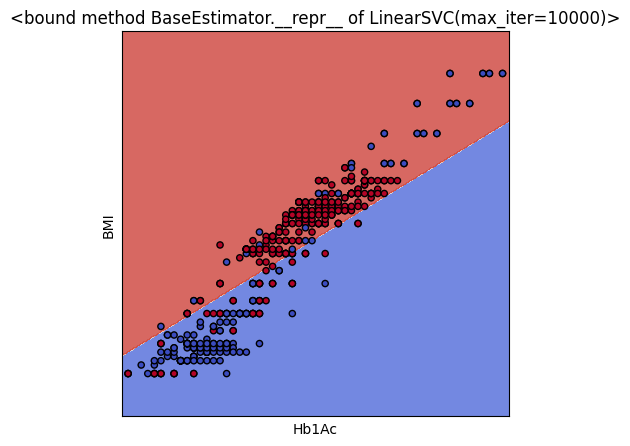

In [21]:
plot_cl(LinearSVC(C=1.0, max_iter=10000))

c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


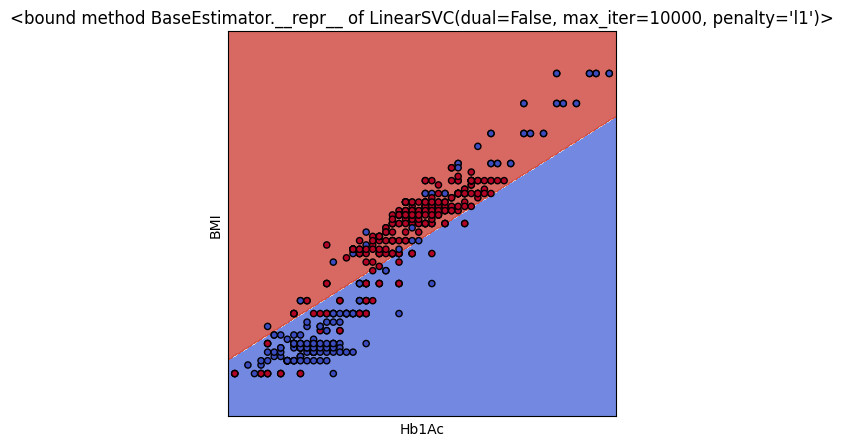

In [22]:
plot_cl(LinearSVC(C=1.0, penalty='l1', dual=False, max_iter=10000))

c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


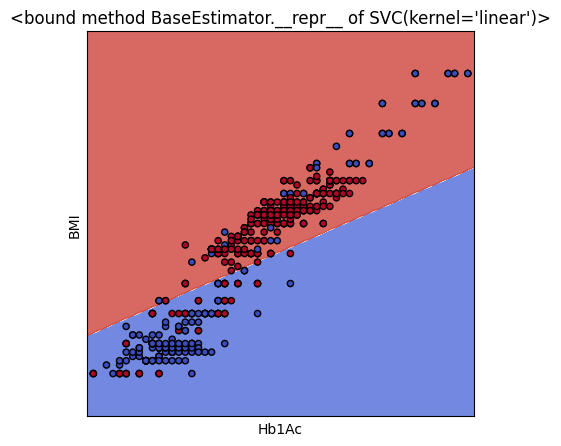

In [23]:
plot_cl(SVC(kernel='linear', C=1.0))

c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


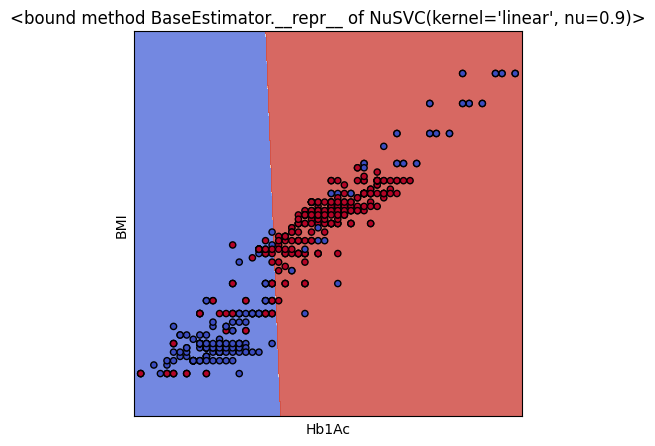

In [24]:
plot_cl(NuSVC(kernel='linear', nu=0.9))

c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


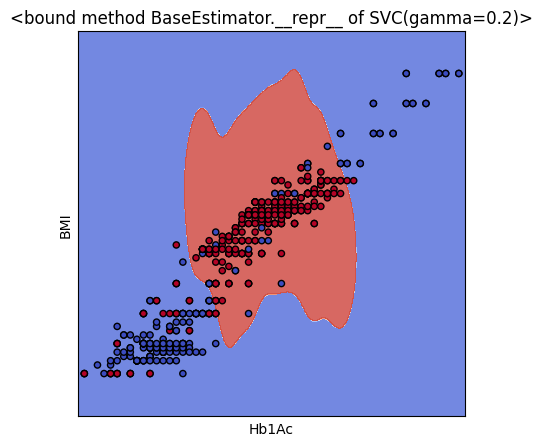

In [146]:
clf_svc = SVC(kernel='rbf', gamma=0.2, C=1.0)
plot_cl(clf_svc)

c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


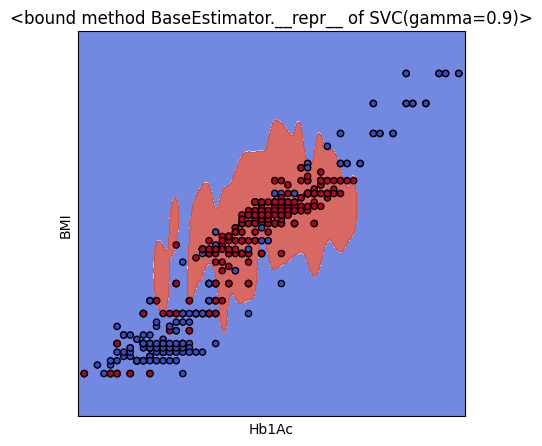

In [26]:
plot_cl(SVC(kernel='rbf', gamma=0.9, C=1.0))

c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\utils\validation.py:1300: DataConversionWarning: A column-vector y was passed when a 1d array was expected. Please change the shape of y to (n_samples, ), for example using ravel().
  y = column_or_1d(y, warn=True)


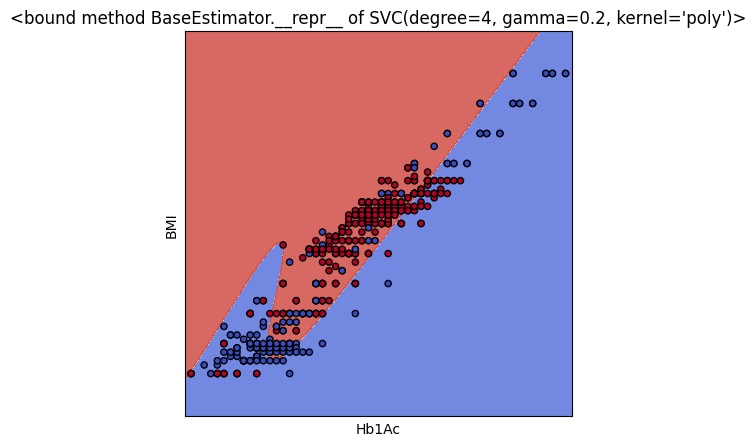

In [27]:
plot_cl(SVC(kernel='poly', degree=4, gamma=0.2, C=1.0))

4.3 Дерево решений

In [122]:
target_column = 'Diagnosis'
feature_names = ['Age', 'BMI', 'FBS', 'HbA1c', 'Family History of Diabetes', 'Smoking', 'Exercise']
data_x_ds = pd.DataFrame(data=data, columns=feature_names)
data_x_ds[target_column] = data[target_column]
data_x_ds.head()

,Age,BMI,FBS,HbA1c,Family History of Diabetes,Smoking,Exercise,Diagnosis
0,45,25,100,5.7,0,0,0.5,0
1,55,30,120,6.4,1,1,0.0,1
2,65,35,140,7.1,1,1,0.0,1
3,75,40,160,7.8,1,1,0.0,1
4,40,20,80,5.0,0,0,0.5,0


In [129]:
def plot_tree_classification(title_param, data):
    """
    Построение деревьев и вывод графиков для заданного датасета
    """
    n_classes = len(np.unique(data['Diagnosis']))
    plot_colors = "ryb"
    plot_step = 0.02
    
    for pairidx, pair in enumerate([[0, 1], [0, 2], [0, 3],
                                    [1, 2], [1, 3], [2, 3]]):
        # We only take the two corresponding features
        X = data.iloc[:, pair]
        y = data['Diagnosis']

        # Train
        clf = DecisionTreeClassifier(random_state=1).fit(X, y)

        plt.title(title_param)

        x_min, x_max = X.iloc[:, 0].min() - 1, X.iloc[:, 0].max() + 1
        y_min, y_max = X.iloc[:, 1].min() - 1, X.iloc[:, 1].max() + 1
        xx, yy = np.meshgrid(np.arange(x_min, x_max, plot_step),
                             np.arange(y_min, y_max, plot_step))
        plt.tight_layout(h_pad=0.5, w_pad=0.5, pad=2.5)

        Z = clf.predict(np.c_[xx.ravel(), yy.ravel()])
        Z = Z.reshape(xx.shape)
        cs = plt.contourf(xx, yy, Z, cmap=plt.cm.RdYlBu)

        plt.xlabel(data.columns[pair[0]])
        plt.ylabel(data.columns[pair[1]])

        # Plot the training points
        for i, color in zip(range(n_classes), plot_colors):
            plt.scatter(X.loc[y == i, X.columns[0]], X.loc[y == i, X.columns[1]], c=color, label=data['Diagnosis'].unique()[i],
                cmap=plt.cm.RdYlBu, edgecolor='black', s=15)



        plt.show()  

c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\yulia\AppData\Local\Temp\ipykernel_38788\2202936499.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[y == i, X.columns[0]], X.loc[y == i, X.columns[1]], c=color, label=data['Diagnosis'].unique()[i],


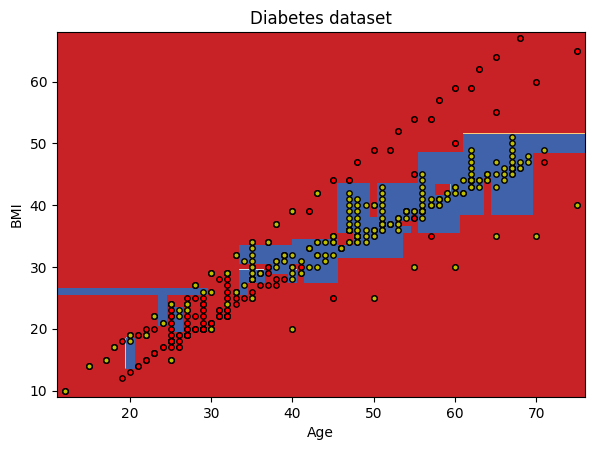

c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\yulia\AppData\Local\Temp\ipykernel_38788\2202936499.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[y == i, X.columns[0]], X.loc[y == i, X.columns[1]], c=color, label=data['Diagnosis'].unique()[i],


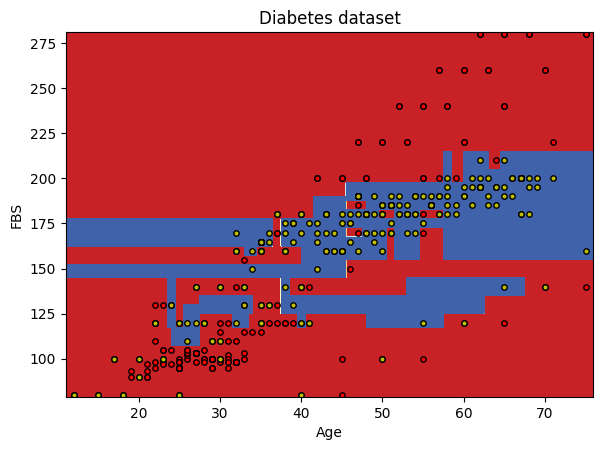

c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\yulia\AppData\Local\Temp\ipykernel_38788\2202936499.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[y == i, X.columns[0]], X.loc[y == i, X.columns[1]], c=color, label=data['Diagnosis'].unique()[i],


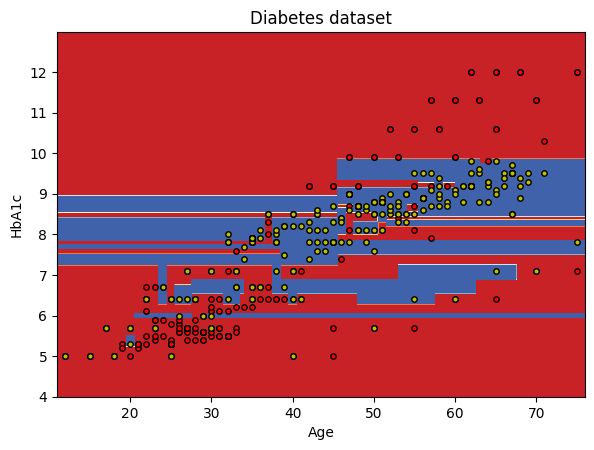

c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\yulia\AppData\Local\Temp\ipykernel_38788\2202936499.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[y == i, X.columns[0]], X.loc[y == i, X.columns[1]], c=color, label=data['Diagnosis'].unique()[i],


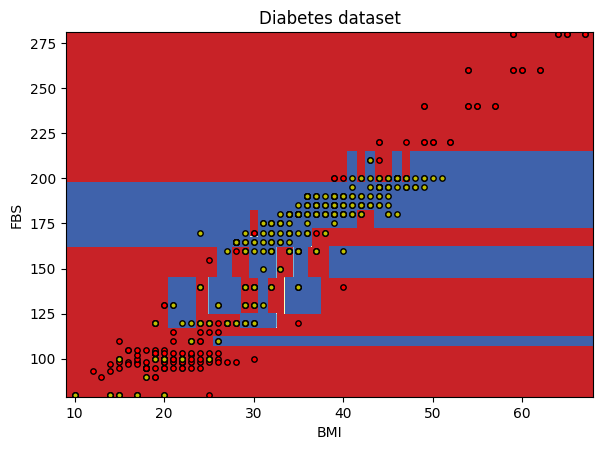

c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\yulia\AppData\Local\Temp\ipykernel_38788\2202936499.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[y == i, X.columns[0]], X.loc[y == i, X.columns[1]], c=color, label=data['Diagnosis'].unique()[i],


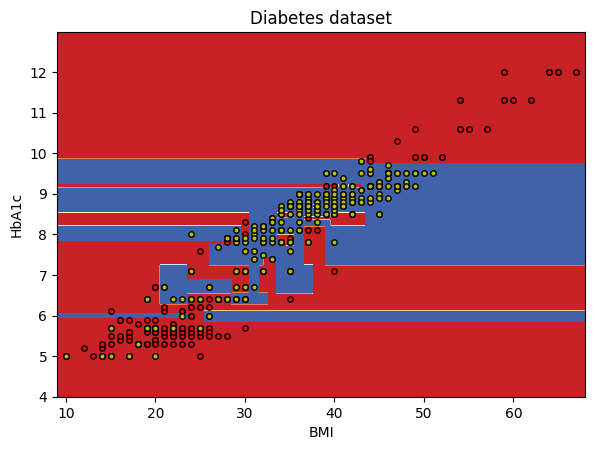

c:\Users\yulia\AppData\Local\Programs\Python\Python39\lib\site-packages\sklearn\base.py:493: UserWarning: X does not have valid feature names, but DecisionTreeClassifier was fitted with feature names
  warnings.warn(
C:\Users\yulia\AppData\Local\Temp\ipykernel_38788\2202936499.py:35: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  plt.scatter(X.loc[y == i, X.columns[0]], X.loc[y == i, X.columns[1]], c=color, label=data['Diagnosis'].unique()[i],


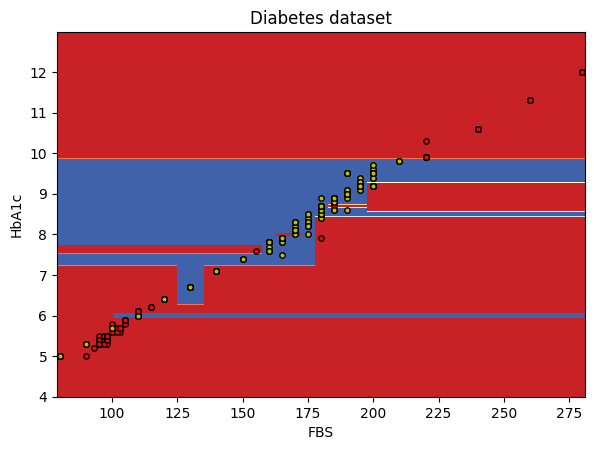

In [130]:
plot_tree_classification('Diabetes dataset', data_x_ds)

In [137]:
# Обучим дерево на всех признаках
data_tree_cl = DecisionTreeClassifier(random_state=1)
data_tree_cl.fit(data_x_ds.drop(columns="Diagnosis"), data_x_ds["Diagnosis"])
data_tree_cl

DecisionTreeClassifier(random_state=1)

7. Правила дерева решений в текстовом виде

In [138]:
from IPython.core.display import HTML
from sklearn.tree import export_text
tree_rules = export_text(data_tree_cl, feature_names=feature_names)
HTML('<pre>' + tree_rules + '</pre>')

6. Важность признаков в дереве решений

In [139]:
list(zip(data_x_ds.columns.drop("Diagnosis").values, data_tree_cl.feature_importances_))

[('Age', 0.1296773468155688),
 ('BMI', 0.058044265097905945),
 ('FBS', 0.5261854170961017),
 ('HbA1c', 0.046463975104317524),
 ('Family History of Diabetes', 0.08290860992291199),
 ('Smoking', 0.10383815838035938),
 ('Exercise', 0.05288222758283469)]

In [140]:
# Важность признаков в сумме дает единицу
sum(data_tree_cl.feature_importances_)

1.0

In [141]:
from operator import itemgetter

def draw_feature_importances(tree_model, X_dataset, figsize=(18,5)):
    """
    Вывод важности признаков в виде графика
    """
    # Сортировка значений важности признаков по убыванию
    list_to_sort = list(zip(X_dataset.columns.values, tree_model.feature_importances_))
    sorted_list = sorted(list_to_sort, key=itemgetter(1), reverse = True)
    # Названия признаков
    labels = [x for x,_ in sorted_list]
    # Важности признаков
    data = [x for _,x in sorted_list]
    # Вывод графика
    fig, ax = plt.subplots(figsize=figsize)
    ind = np.arange(len(labels))
    plt.bar(ind, data)
    plt.xticks(ind, labels, rotation='vertical')
    # Вывод значений
    for a,b in zip(ind, data):
        plt.text(a-0.05, b+0.01, str(round(b,3)))
    plt.show()
    return labels, data

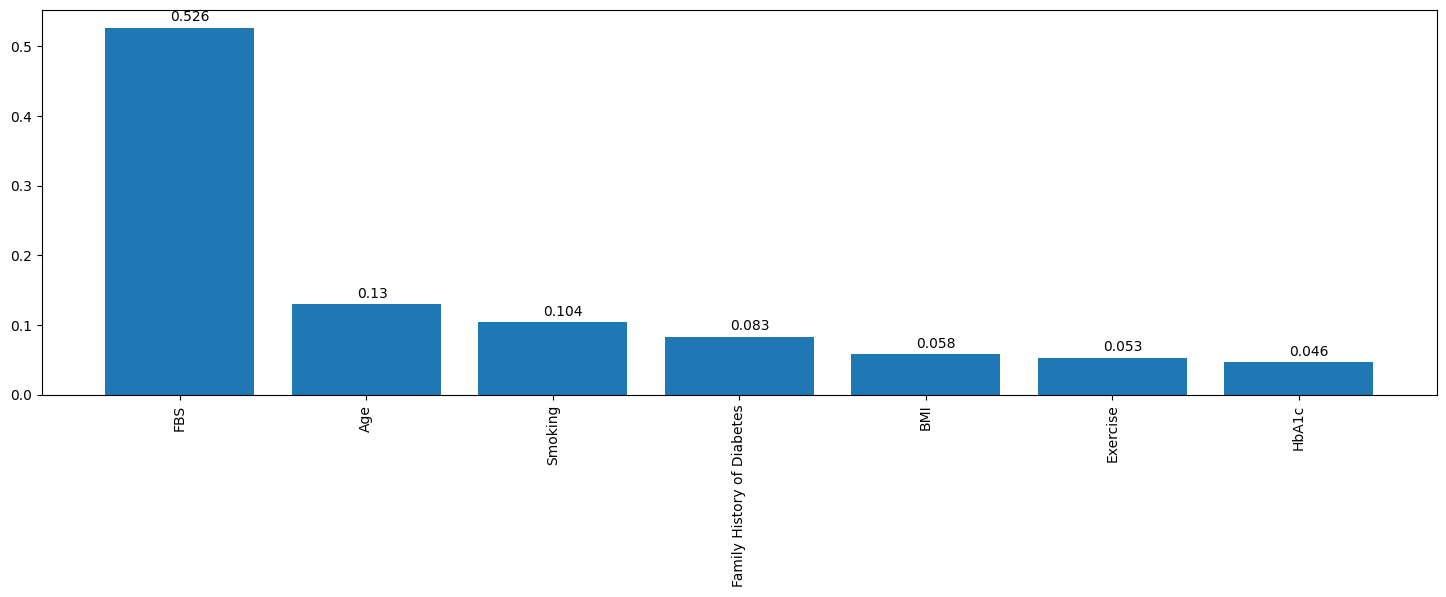

In [142]:
data_tree_cl_fl, data_tree_cl_fd = draw_feature_importances(data_tree_cl, data_x_ds)

5. Оценка качества модели

In [148]:
# Логическая регрессия
acc_lr = accuracy_score(data_Y_test, pred_data_y_test)
acc_lr

0.7551867219917012

In [149]:
f1_lr = f1_score(data_Y_test, pred_data_y_test, average='weighted')
f1_lr

0.7545925253078509

In [150]:
# SVM
pred_svc = clf_svc.predict(data_X_test)

In [151]:
acc_svc = accuracy_score(data_Y_test, pred_svc)
acc_svc

0.8049792531120332

In [152]:
f1_svc = f1_score(data_Y_test, pred_svc, average='weighted')

In [153]:
# Дерево решений
pred_tree = data_tree_cl.predict(data_x_ds.drop(columns="Diagnosis"))
acc_tree = accuracy_score(data_x_ds["Diagnosis"], pred_tree)
acc_tree

0.997920997920998

In [154]:
f1_tree = f1_score(data_x_ds["Diagnosis"], pred_tree, average='weighted')
f1_tree

0.9979211418557171